<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/car_xg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/CO2 Emissions_Canada.csv')

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [ ]:
df['City_Hwy_Ratio'] = df['Fuel Consumption City (L/100 km)'] / df['Fuel Consumption Hwy (L/100 km)']


In [ ]:
df['Make'].value_counts()

,count
Make,
FORD,628
CHEVROLET,588
BMW,527
MERCEDES-BENZ,419
PORSCHE,376
TOYOTA,330
GMC,328
AUDI,286
NISSAN,259


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Make']=oe.fit_transform(df[['Make']])
df['Model']=oe.fit_transform(df[['Model']])
df['Vehicle Class']=oe.fit_transform(df[['Vehicle Class']])
df['Transmission']=oe.fit_transform(df[['Transmission']])
df['Fuel Type']=oe.fit_transform(df[['Fuel Type']])

In [ ]:
df.head(20)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),City_Hwy_Ratio
0,0.0,1057.0,0.0,2.0,4,14.0,4.0,9.9,6.7,8.5,33,196,1.477612
1,0.0,1057.0,0.0,2.4,4,25.0,4.0,11.2,7.7,9.6,29,221,1.454545
2,0.0,1058.0,0.0,1.5,4,22.0,4.0,6.0,5.8,5.9,48,136,1.034483
3,0.0,1233.0,11.0,3.5,6,15.0,4.0,12.7,9.1,11.1,25,255,1.395604
4,0.0,1499.0,11.0,3.5,6,15.0,4.0,12.1,8.7,10.6,27,244,1.390805
5,0.0,1510.0,2.0,3.5,6,15.0,4.0,11.9,7.7,10.0,28,230,1.545455
6,0.0,1778.0,2.0,3.5,6,15.0,4.0,11.8,8.1,10.1,28,232,1.456790
7,0.0,1779.0,2.0,3.7,6,15.0,4.0,12.8,9.0,11.1,25,255,1.422222
8,0.0,1779.0,2.0,3.7,6,25.0,4.0,13.4,9.5,11.6,24,267,1.410526
9,0.0,1803.0,0.0,2.4,4,14.0,4.0,10.6,7.5,9.2,31,212,1.413333


<Axes: >

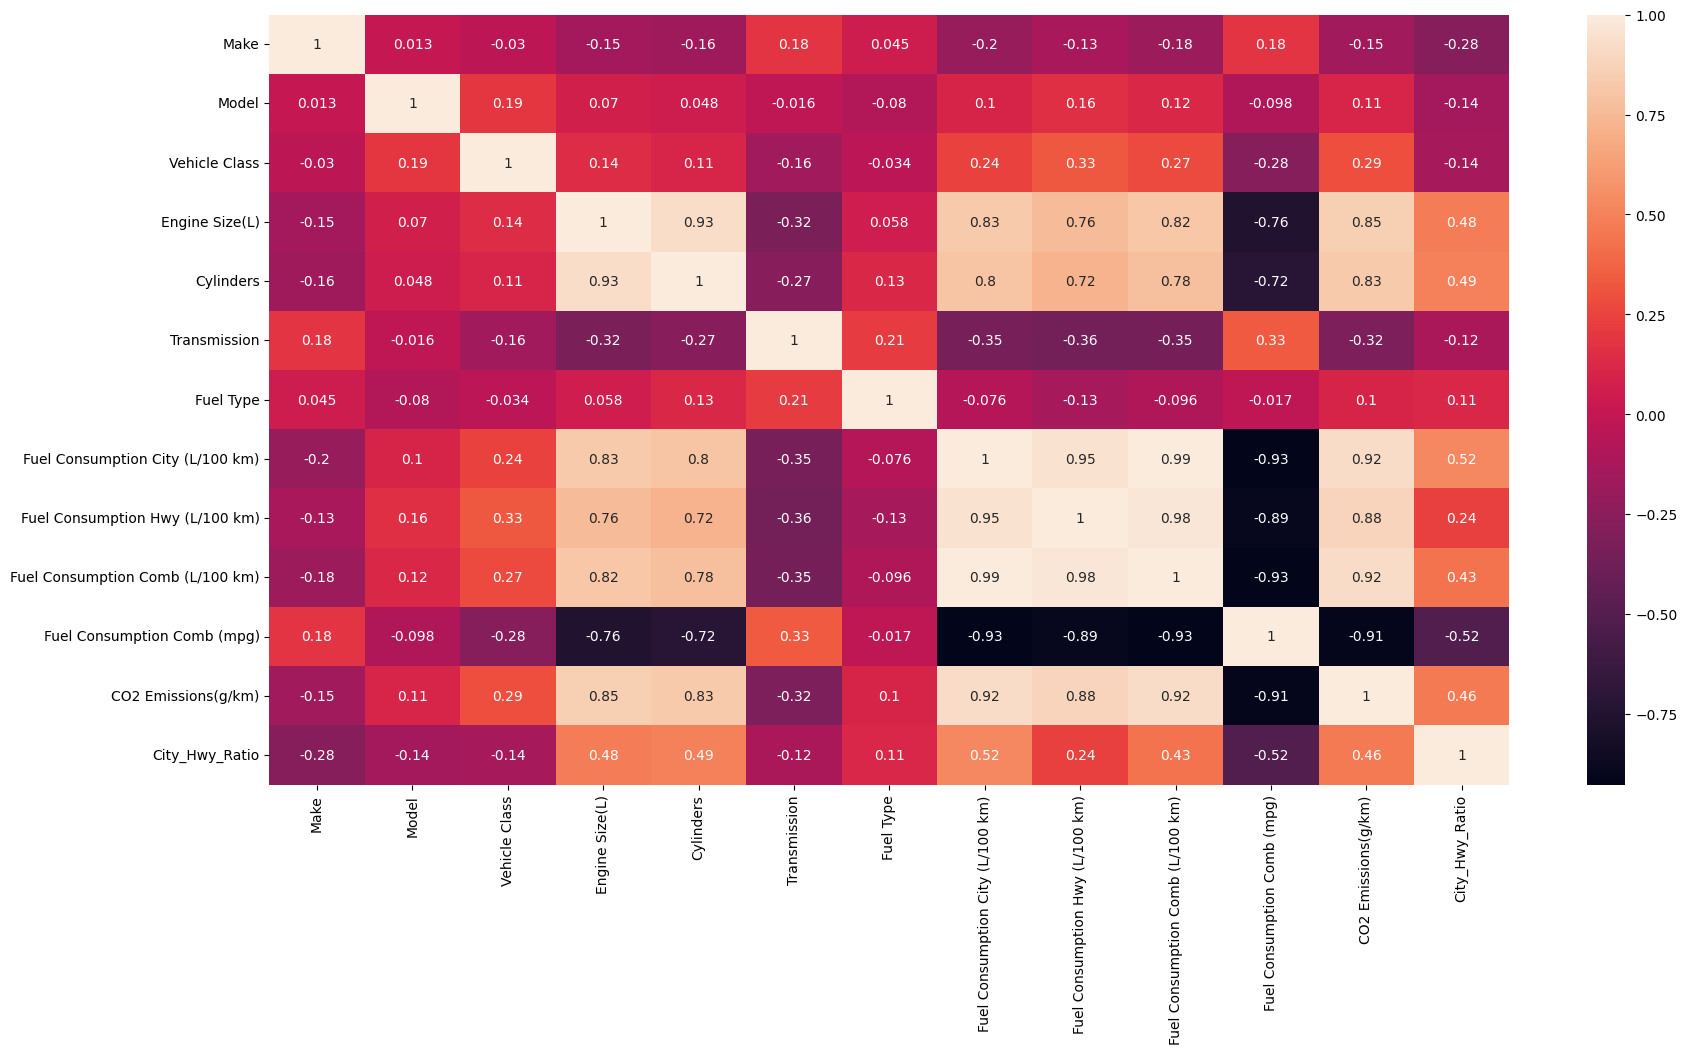

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(columns=["Make","Model","Transmission","Fuel Consumption Comb (L/100 km)"],inplace=True)

In [ ]:
x=df.drop(columns=["CO2 Emissions(g/km)"])
y=df["CO2 Emissions(g/km)"]

<Axes: >

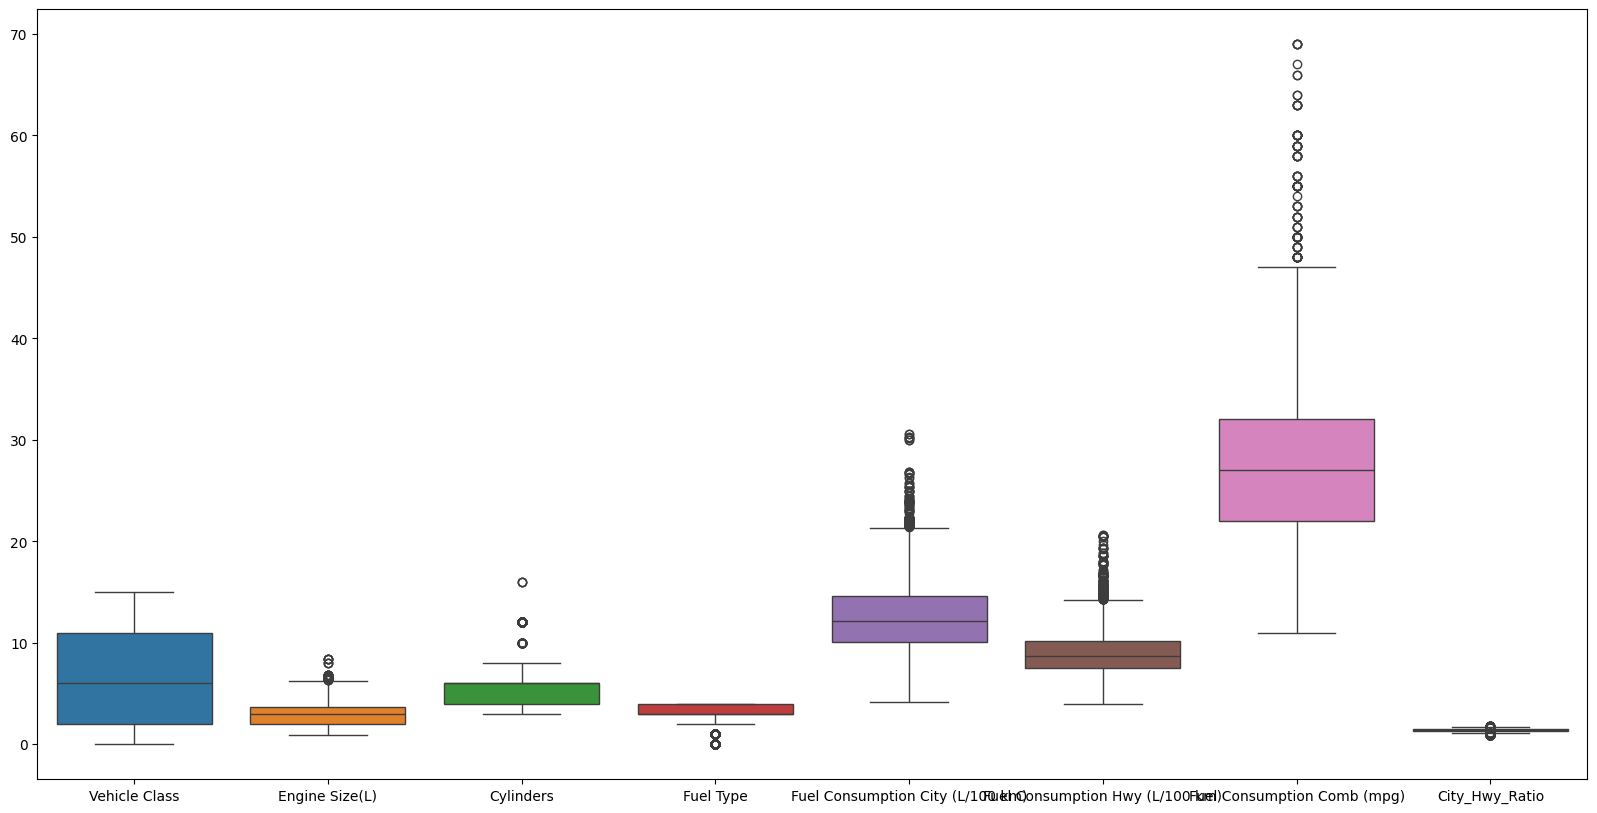

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=x, ax=ax)

In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

<Axes: >

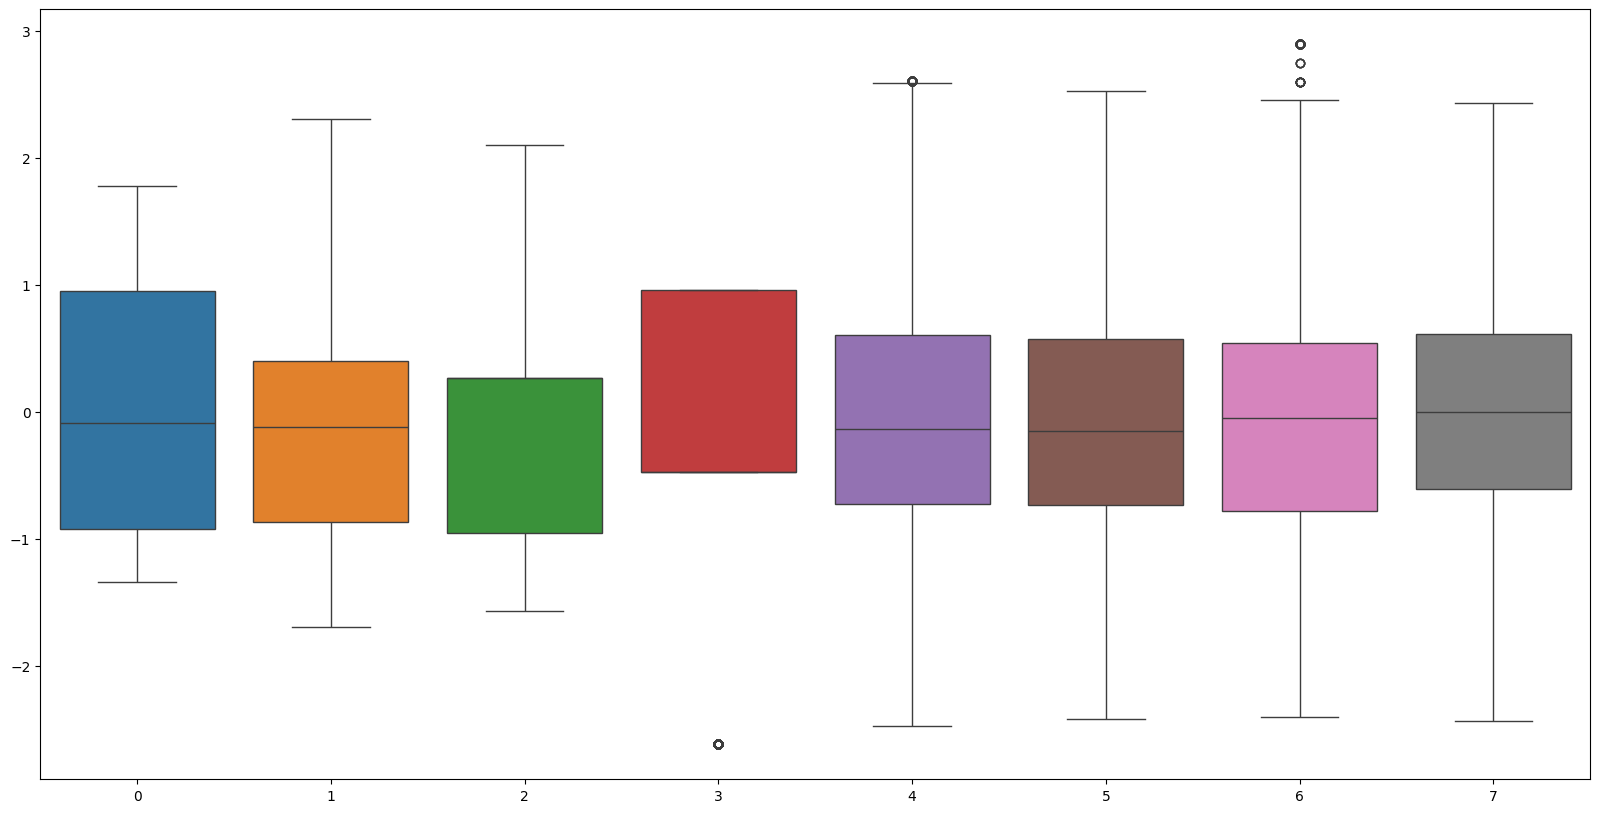

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=x_train_norm, ax=ax)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train_norm,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(x_test_norm)
r2_score(y_test,y_pred)

0.9969135773424188

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train_norm,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred1=xgb.predict(x_test_norm)
r2_score(y_test,y_pred1)

0.9973757266998291

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb, x_train_norm, y_train, cv=5, scoring='r2')
print("CV R2 mean:", cv_scores.mean())


CV R2 mean: 0.994452154636383


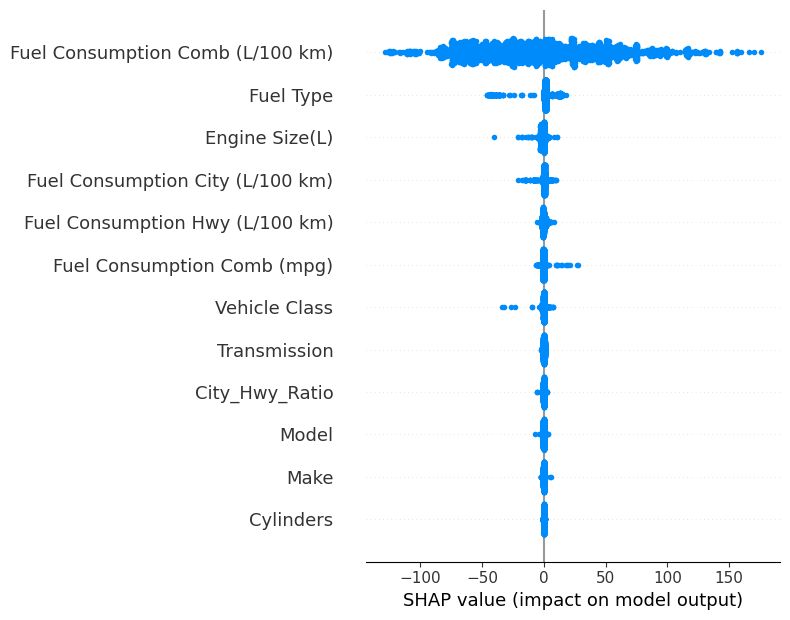

In [ ]:
import shap

# Explain the model
explainer = shap.Explainer(xgb)
shap_values = explainer(x_test_norm)

# Summary plot
shap.summary_plot(shap_values, features=x.columns)
